# Guided Project: Predicting Heart Disease

## Project Overview

This project aims to develop a predictive model for detecting the presence of heart disease using clinical and demographic patient data. By applying machine learning techniques to a structured dataset containing features such as age, chest pain type, blood pressure, cholesterol level, and electrocardiogram results, the goal is to identify key predictors that can support early diagnosis and risk assessment. The final model serves as a tool to enhance decision-making in preventive cardiology and improve patient outcomes through data-driven insights.

### Dataset Features

The dataset used in this project was obtained from [Kaggle: Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), and contains the following features:

- **Age**: Age of the patient (in years)
- **Sex**: Biological sex of the patient  
  - `M`: Male  
  - `F`: Female
- **ChestPainType**: Type of chest pain experienced  
  - `TA`: Typical Angina  
  - `ATA`: Atypical Angina  
  - `NAP`: Non-Anginal Pain  
  - `ASY`: Asymptomatic
- **RestingBP**: Resting blood pressure (in mm Hg)
- **Cholesterol**: Serum cholesterol level (in mg/dl)
- **FastingBS**: Fasting blood sugar level  
  - `1`: > 120 mg/dl  
  - `0`: ≤ 120 mg/dl
- **RestingECG**: Resting electrocardiogram results  
  - `Normal`: Normal  
  - `ST`: ST-T wave abnormality  
  - `LVH`: Left ventricular hypertrophy (by Estes' criteria)
- **MaxHR**: Maximum heart rate achieved (range: 60–202 bpm)
- **ExerciseAngina**: Presence of exercise-induced angina  
  - `Y`: Yes  
  - `N`: No
- **Oldpeak**: ST depression induced by exercise relative to rest (numeric value)
- **ST_Slope**: Slope of the peak exercise ST segment  
  - `Up`: Upsloping  
  - `Flat`: Flat  
  - `Down`: Downsloping
- **HeartDisease**: Target variable indicating heart disease presence  
  - `1`: Heart disease  
  - `0`: Normal

In [1]:
# Importing essential libraries for data handling, visualization, preprocessing, model building, and evaluation
# - pandas & numpy: for data manipulation and numerical operations
# - matplotlib & seaborn: for data visualization
# - sklearn modules: for preprocessing (MinMaxScaler), splitting data, tuning hyperparameters (GridSearchCV),
#   building the KNN model, and evaluating performance with accuracy and confusion matrix
# - %matplotlib inline: ensures inline display of plots in Jupyter notebooks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [2]:
# Loading the heart disease dataset into a pandas DataFrame for analysis.
# This will serve as the foundation for all data exploration, preprocessing, and model development steps.

heart_df = pd.read_csv('heart_disease_prediction.csv')

In [3]:
# Displaying the first five records of the dataset to get an initial glimpse of the data structure,
# feature types, and possible values for exploratory analysis

heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Retrieving a concise summary of the dataset, including:
# - Number of entries (rows)
# - Column names and count
# - Data types of each column
# - Non-null value counts for assessing missing data

heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Generating summary statistics for all numerical features in the dataset.
# This provides insights into central tendencies (mean, median), spread (std, min, max), and potential outliers,
# which are essential for guiding data cleaning and normalization decisions.

heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Initial Observations from Summary Statistics

- **Skewness Check**: A noticeable difference between the mean and median can indicate a skewed distribution.

- **RestingBP**:
  - Minimum value is `0`, which is physiologically implausible and may represent missing or incorrect data.
  - Mean: `132.39`; Median: `130` — fairly close, suggesting a roughly symmetric distribution.

- **Cholesterol**:
  - Minimum value is `0`, potentially a placeholder for missing data.
  - Mean: `198.80`; Median: `173.25` — the mean is higher, indicating a slight right skew.

- **FastingBS**:
  - Binary variable with values `0` and `1`.
  - No apparent issues; suitable for categorical analysis.

- **MaxHR**:
  - All values fall within expected physiological range.
  - No immediate concerns.

- **Oldpeak**:
  - Represents ST depression; numerical readings appear within acceptable ranges.
  - Distribution looks reasonable for modeling.

- **HeartDisease**:
  - Target variable with binary outcomes `0` and `1`.
  - Balanced class distribution to be verified during exploratory analysis

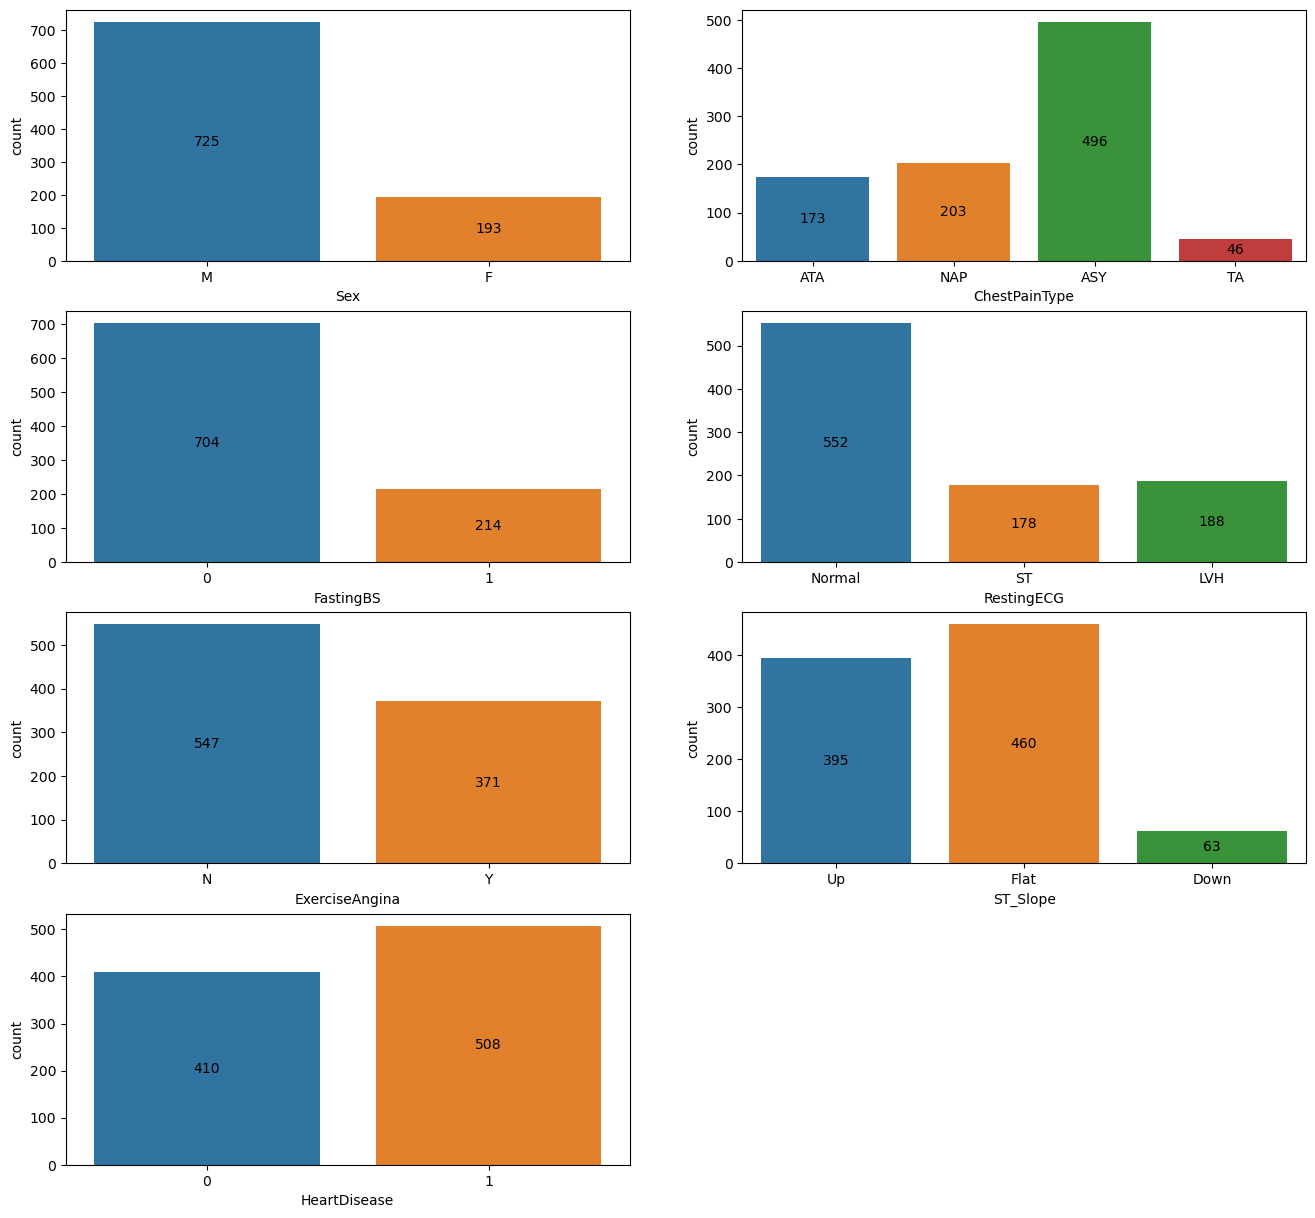

In [6]:
# Define the categorical columns to be visualized
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Set the figure size to accommodate multiple subplots
fig = plt.figure(figsize=(16, 15))

# Loop through each categorical column and create a count plot
for idx, col in enumerate(categorical_cols):
    
    # Create a subplot for each categorical feature
    ax = plt.subplot(4, 2, idx + 1)
    
    # Generate a count plot for the current feature
    sns.countplot(x=heart_df[col], ax=ax)
    
    # Add count labels to each bar for easier interpretation
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

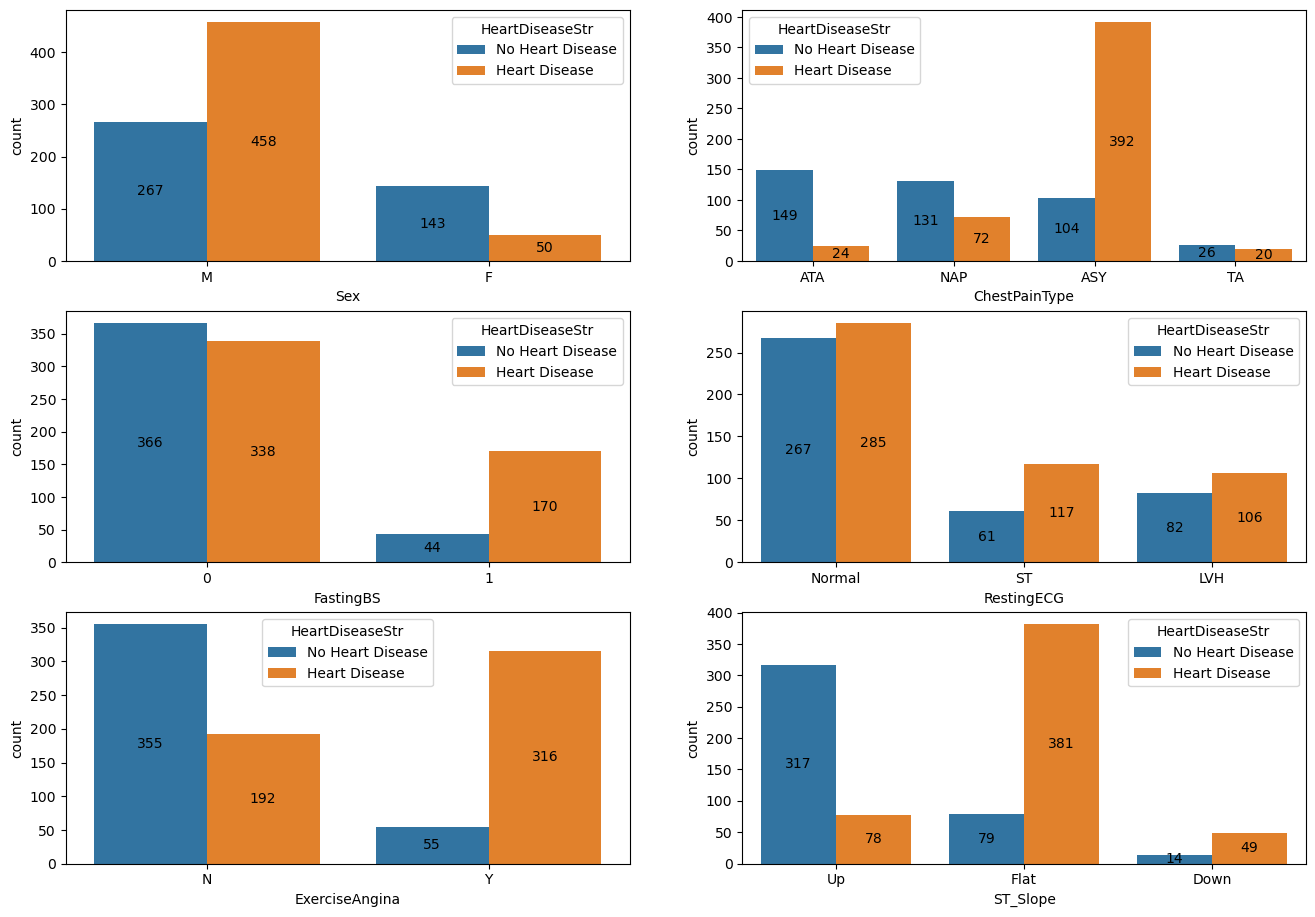

In [7]:
# Creating a new column to give a more readable label for the target variable
# - This will be used as the 'hue' to visually differentiate heart disease outcomes in plots
heart_df['HeartDiseaseStr'] = heart_df['HeartDisease'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

# Setting the canvas size for the multi-plot figure to ensure readability
fig = plt.figure(figsize=(16, 15))

# Looping through all categorical features (excluding the target) to explore their relationship with heart disease
for idx, col in enumerate(categorical_cols[:-1]):
    
    # Create a subplot for the current feature
    ax = plt.subplot(4, 2, idx + 1)
    
    # Generate a count plot for each category, separated by heart disease status
    sns.countplot(x=heart_df[col], hue=heart_df['HeartDiseaseStr'], ax=ax)
    
    # Add data labels to the bars for clarity
    for container in ax.containers:
        ax.bar_label(container, label_type="center")


In [8]:
# Dropping the 'HeartDiseaseStr' column as it was only created for visualization purposes.
# This helps maintain a clean dataset with relevant features for modeling.

heart_df = heart_df.drop('HeartDiseaseStr', axis=1)

In [9]:
# Identifying rows where 'RestingBP' is recorded as 0, which is likely an error or placeholder for missing data.
# Displaying a concise summary of those rows to assess how many are affected and to evaluate associated feature values.

heart_df[heart_df['RestingBP'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes


In [10]:
# Identifying rows where 'Cholesterol' is recorded as 0,
# which may represent missing or incorrectly entered values.
# Using .info() to count affected rows and inspect the presence of missing values in related features.

heart_df[heart_df['Cholesterol'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


In [11]:
"""
Cleaning the dataset to address implausible or placeholder values.

- For 'RestingBP': Rows with zero values are dropped, as a blood pressure of 0 mm Hg is not physiologically valid.
- For 'Cholesterol': Zero values are imputed using separate medians based on heart disease status,
  ensuring that replacements reflect distinct distributions for patients with and without heart disease.
"""

# Create a copy of the dataset to preserve the original
df_clean = heart_df.copy()

# Remove rows with RestingBP equal to zero
df_clean = df_clean[df_clean['RestingBP'] != 0]

# Create a boolean mask where HeartDisease == 0 (i.e., no heart disease)
heartdisease_mask = df_clean['HeartDisease'] == 0

# Subset Cholesterol values based on heart disease status
cholesterol_without_heartdisease = df_clean.loc[heartdisease_mask, "Cholesterol"]
cholesterol_with_heartdisease = df_clean.loc[~heartdisease_mask, "Cholesterol"]

# Replace zero values in each group with the group's respective median
df_clean.loc[heartdisease_mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(
    to_replace=0, value=cholesterol_without_heartdisease.median()
)
df_clean.loc[~heartdisease_mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(
    to_replace=0, value=cholesterol_with_heartdisease.median()
)

In [12]:
# Generating summary statistics for 'Cholesterol' and 'RestingBP' after cleaning.
# This helps verify that:
# - All zero values have been addressed (e.g., no minimums of 0)
# - Central tendencies and ranges now reflect more realistic physiological values
# - The cleaning process has aligned the distributions more closely with expected norms

df_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [13]:
# Export the cleaned dataset to a CSV file without including the index
# This ensures a clean file structure for further analysis, modeling, or sharing
df_clean.to_csv('heart_disease_prediction_clean.csv', index=False)

In [14]:
# Converting categorical variables into numerical format using one-hot encoding.
# - pd.get_dummies() creates binary columns for each category, enabling their use in machine learning models.

# - drop_first=True avoids multicollinearity by removing the first category in each encoded feature (serves as a baseline).
df_clean = pd.get_dummies(df_clean, drop_first=True)

# Previewing the transformed dataset to verify that encoding has been applied correctly.
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


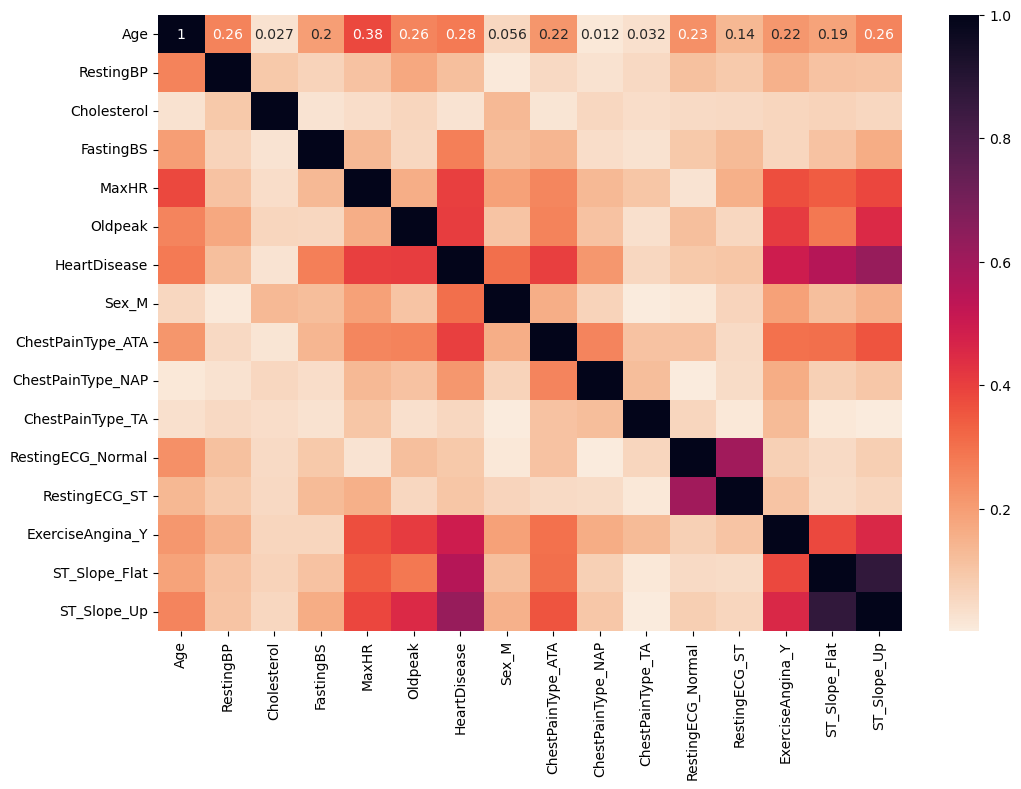

In [15]:
# Computing the absolute correlation matrix to understand the strength of relationships between features,
# regardless of whether the association is positive or negative.
correlations = abs(df_clean.corr())

# Setting the figure size to make the heatmap easier to interpret
plt.figure(figsize=(12, 8))

# Plotting a heatmap of the correlation matrix
# - annot=True adds the correlation coefficients to each cell
# - cmap="rocket_r" provides a visually striking reversed 'rocket' color palette
sns.heatmap(correlations, annot=True, cmap="rocket_r")

# Display the heatmap
plt.show()

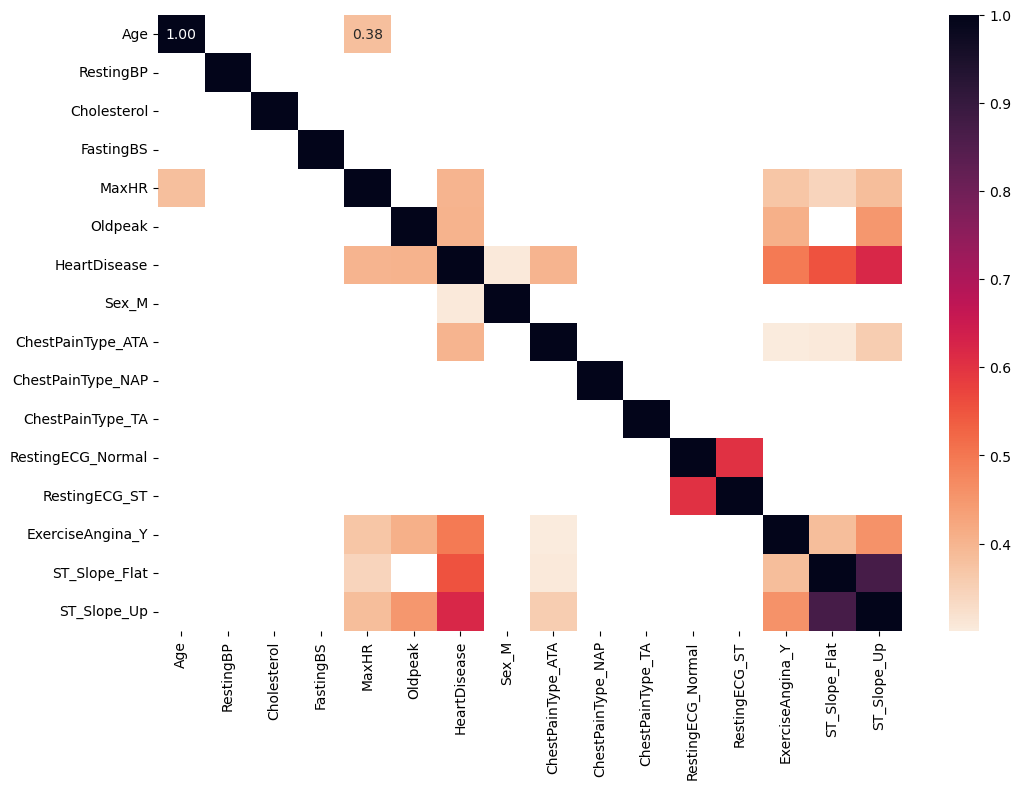

In [16]:
# Filtering and visualizing only moderate-to-strong correlations (correlation > 0.3) for clearer insight.

# Set figure size for improved readability of the heatmap
plt.figure(figsize=(12, 8))

# Retain only correlations greater than 0.3 (ignoring weaker associations)
display_correlations = correlations[(correlations > 0.3)]

# Generate a mask to hide non-significant (NaN) correlations
mask = display_correlations.isnull()

# Format correlation values for annotation, skipping blanks
annot_labels = display_correlations.map(lambda x: f"{x:.2f}" if pd.notna(x) else '')

# Plot the heatmap to highlight stronger feature relationships
sns.heatmap(display_correlations, annot=annot_labels, fmt="", cmap="rocket_r")

# Display the plot
plt.show()

In [17]:
# Building and evaluating K-Nearest Neighbors (KNN) models using selected individual features.

# Define features (X) and target variable (y)
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

# Split the data into training and validation sets (85% train, 15% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=417)

# Select features based on their strong correlation with heart disease
features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",
    "ChestPainType_ATA",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

# Train a KNN model (k=3) on each individual feature and evaluate its accuracy
for feature in features:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[[feature]], y_train)  # Train on single feature
    accuracy = knn.score(X_val[[feature]], y_val)  # Evaluate on validation set
    print(f"The K-NN classifier trained on {feature} (k=3) achieved an accuracy of {accuracy * 100:.2f}%")

The K-NN classifier trained on MaxHR (k=3) achieved an accuracy of 66.67%
The K-NN classifier trained on Oldpeak (k=3) achieved an accuracy of 76.81%
The K-NN classifier trained on Sex_M (k=3) achieved an accuracy of 44.93%
The K-NN classifier trained on ChestPainType_ATA (k=3) achieved an accuracy of 44.93%
The K-NN classifier trained on ExerciseAngina_Y (k=3) achieved an accuracy of 73.19%
The K-NN classifier trained on ST_Slope_Flat (k=3) achieved an accuracy of 81.88%
The K-NN classifier trained on ST_Slope_Up (k=3) achieved an accuracy of 84.06%


In [18]:
# Modeling with multiple high-correlation features using the K-Nearest Neighbors algorithm.

# Initialize the MinMaxScaler to normalize feature values between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler on the training set and apply transformation
X_train_scaled = scaler.fit_transform(X_train[features])

# Apply the same transformation to the validation set
X_val_scaled = scaler.transform(X_val[features])

# Initialize and train the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Evaluate model performance on the scaled validation data
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 84.78


In [19]:
# Defining features (X) and target variable (y) for classification
X = df_clean.drop(["HeartDisease"], axis=1)
y = df_clean["HeartDisease"]

# Splitting the dataset into training and test sets (85% train, 15% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

# Selecting a subset of features with strong correlation to heart disease
features = [
    "MaxHR",
    "Oldpeak",
    "Sex_M",  
    "ChestPainType_ATA",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

# Initializing MinMaxScaler to normalize selected features to the 0–1 range
scaler = MinMaxScaler()

# Applying the scaler to the training subset of selected features
X_train_scaled = scaler.fit_transform(X_train[features])# Finding the best parameters for modeling

In [20]:
# Tuning KNN hyperparameters using GridSearchCV to identify the optimal combination for best model accuracy.

# Define a grid of hyperparameters to search:
# - 'n_neighbors': tries different values of k from 1 to 29
# - 'metric': explores various distance metrics for calculating neighbor proximity
grid_params = {
    "n_neighbors": range(1, 30),
    "metric": ["minkowski", "manhattan", "hamming", "euclidean"]
}

# Initialize a basic KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV with accuracy as the evaluation metric
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')

# Fit the model on the scaled training data to find the best combination of parameters
knn_grid.fit(X_train_scaled, y_train);

In [21]:
# Output the best accuracy score (as a percentage) and the corresponding hyperparameters
knn_grid.best_score_ * 100, knn_grid.best_params_

(84.46236559139786, {'metric': 'minkowski', 'n_neighbors': 24})

In [22]:
# Scaling the test set features using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test[features])

# Using the best KNN model from GridSearchCV to predict outcomes on unseen test data
predictions = knn_grid.best_estimator_.predict(X_test_scaled)

# Calculating accuracy by comparing predicted outcomes with actual values
accuracy = accuracy_score(y_test, predictions)

# Displaying the model's performance on the test set
print(f"Model Accuracy on test set: {accuracy*100:.2f}")

Model Accuracy on test set: 86.23


In [23]:
# Checking if there's any imbalance or sampling bias in the distribution of the 'Sex_M' feature
# This helps explain unexpected model performance (e.g., higher test accuracy than training)

print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())  # 1 = Male, 0 = Female

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
Sex_M
True     724
False    193
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
Sex_M
True     615
False    164
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
Sex_M
True     109
False     29
Name: count, dtype: int64


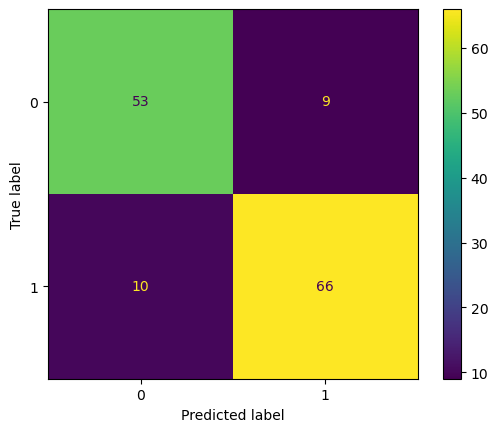

In [24]:
# Generating a confusion matrix to visually evaluate the model's classification performance.
# This shows how well the model distinguishes between patients with and without heart disease.

cf = confusion_matrix(y_test, predictions)  # Compute the confusion matrix

# Plot the confusion matrix as a visual display
ConfusionMatrixDisplay(cf).plot()

# Render the plot
plt.show()

### Findings Summary: Heart Disease Prediction using KNN

- **Feature Importance**:  
  The strongest correlations with heart disease were observed in:
  - `ST_Slope_Up` and `ST_Slope_Flat` (derived from `ST_Slope` after encoding)
  - `ExerciseAngina_Y` (representing patients who experienced exercise-induced angina)

- **Individual Feature Modeling with KNN (k=3)**:  
  Among features with correlation above 0.3:
  - `ST_Slope_Up` achieved an accuracy of **84.06%**
  - `ST_Slope_Flat`: **81.88%**
  - `Oldpeak`: **76.81%**


- **Combined Feature Modeling**:  
  Using all seven features with correlation > 0.3 resulted in an improved accuracy of **84.78%**.

- **Hyperparameter Tuning with GridSearchCV**:  
  - Best `k` value: **24**  
  - Best distance metric: **minkowski**  
  This combination led to a further boost in performance with a test accuracy of **86.23%**.

- **Confusion Matrix Results**:
  - **True Negatives**: 53 patients correctly identified as not having heart disease
  - **True Positives**: 66 patients correctly identified as having heart disease
  - **False Positives**: 9 patients incorrectly predicted to have heart disease
  - **False Negatives**: 10 patients incorrectly predicted to be disease-free

### Implications

- The model demonstrates **high predictive capability**, especially with features linked to ECG response (`ST_Slope`) and exercise-induced symptoms.
- **False negatives (10 cases)** are clinically critical and could lead to undiagnosed heart disease—highlighting a need for model sensitivity tuning if applied in healthcare.
- **False positives (9 cases)**, while safer from a medical standpoint, could lead to unnecessary stress and further testing.
- Hyperparameter tuning significantly improved performance, showing the value of systematic optimization.

Overall, the model is **well-calibrated** and interpretable—making it a strong candidate for risk stratification in clinical decision-support systems. Further refinement could involve balancing precision and recall to minimize diagnostic risk.